<a href="https://colab.research.google.com/github/leandroborgeseng/Tese_R/blob/main/Doutorado_versao_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#################################################
# Autor: Leandro Borges -- leandro.borges@me.com
# Ultima atualização -- out. 2021
#################################################

#O que o software faz?#
# 0 - Importa bibliotecas que serão usadas no tratamento dos dados;
# 1 - Software importa os dados do SINAM que estão em formato DBF;
# 2 - Software seleciona somente as colunas de interesse para análise e aglutina os dados
#     formando uma única tabela para análise. Esta tabela está dividida em casos de Dengue
#     e casos de Chickunia.
#


################################################################################
#Instalando pacotes e carregando as bibliotecas que serão utilizadas na análise:
################################################################################

#Instalando pacotes disponiveis no CRAN

install.packages("na.tools", dependencies=TRUE)
library(na.tools) #retirar valores N/A dos datasets
#install.packages("dplyr") //já instalado como pacote default
library(dplyr) #select, summarise etc..
install.packages("ROSE", dependencies=TRUE)
library(ROSE) #Balancear dados.

install.packages("sqldf", dependencies=TRUE)
library(sqldf)

#install.packages("ggplot2")
library(ggplot2)

#library(cvms)
#library(broom)    
library(tibble)  

#install.packages("remotes")
#remotes::install_github("rfsaldanha/microdatasus")
#library(microdatasus)

install.packages("neuralnet")
library(neuralnet)

# Install the required package for function
install.packages("randomForest")
library(randomForest)

#install.packages("keras")
#library(keras)

#library(broom)
#library(equatiomatic) #extrair equação para o software
#library(cvms) # matriz de confusão graficos e estimativa de acerto
#install.packages("foreign") 
library(foreign) #read.dbf
#install.packages("googledrive") 
install.packages("httpuv")
library(googledrive) 
library(httpuv)

##############################################################################
# Rotina de conexão ao google Drive para baixar arquivos diretamente para a 
# instancia para que eles possam ser importados
# Esta rotina será usada caso o processo de recuperação de arquivos diretamente 
# do servidor de FTP do Ministério da Saúde Falhe e o minidatasus não consiga
# funcionar corretamente
###############################################################################

if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library(R.utils)
  library(httr)
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

drive_auth(use_oob = TRUE, cache = FALSE)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘tree’


Loaded ROSE 0.0-4


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plogr’, ‘RJDBC’, ‘rJava’, ‘gsubfn’, ‘proto’, ‘RSQLite’, ‘chron’, ‘RH2’, ‘RMySQL’, ‘RPostgreSQL’, ‘svUnit’


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’



Attaching package: ‘neuralnet’


The following object is ma

Enter authorization code: 4/1AX4XfWirIPzPuc3jVWvF7Ii1Li3-f9Xvn1pVSEPjNPELhQNdquLsr8d14R0


In [ ]:
#Como a versão do R no google colab é sempre a mais atual, alguns pacotes podem não 
# estar disponíveis para ultima versão do R.
# Dessa forma devemos baixar o código fonte dos pacotes e compila-los para que eles
# possam ser utilizados.
# Se usarmos o método convencional de instalação receberemos um erro dizendo que o
# pacote não pode ser encontrado.

##Caso tenha alguma URL quebrada entrar neste diretorio e verificar a versao mais nova
#do software https://cran.r-project.org/src/contrib/


packageurl<-"https://cran.r-project.org/src/contrib/Archive/nloptr/nloptr_1.2.1.tar.gz"

install.packages(packageurl, repos=NULL, type="source")

packageurl<-"https://cran.r-project.org/src/contrib/magick_2.7.3.tar.gz"

install.packages(packageurl, repos=NULL, type="source")

packageurl<-"https://cran.r-project.org/src/contrib/lme4_1.1-28.tar.gz"

install.packages(packageurl, repos=NULL, type="source")

packageurl<-"https://cran.r-project.org/src/contrib/ggimage_0.3.0.tar.gz"

install.packages(packageurl, repos=NULL, type="source")

packageurl<-"https://cran.r-project.org/src/contrib/rsvg_2.2.0.tar.gz"

install.packages(packageurl, repos=NULL, type="source")

install.packages("cvms",dependencies=TRUE)

library(cvms)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(packageurl, repos = NULL, type = "source"):
“installation of package ‘/tmp/RtmpYMPGBL/downloaded_packages/magick_2.7.3.tar.gz’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(packageurl, repos = NULL, type = "source"):
“installation of package ‘/tmp/RtmpYMPGBL/downloaded_packages/lme4_1.1-28.tar.gz’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(packageurl, repos = NULL, type = "source"):
“installation of package ‘/tmp/RtmpYMPGBL/downloaded_packages/ggimage_0.3.0.tar.gz’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(packageurl, repos = NULL, type = "source"):
“installation of pack

In [ ]:
print(sessionInfo())
print(version)



library(purrr)
c("na.tools", "dplyr", "ROSE","sqldf","ggplot2","tibble","neuralnet","randomForest","foreign","googledrive","httpuv","R.utils","httr","cvms") %>%
map(citation) %>%
print(style = "text")


R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] cvms_1.3.3         httr_1.4.2         R.utils_2.11.0     R.oo_1.24.0       
 [5] R.methodsS3_1.8.1  httpuv_1.6.5       googledrive_2.0.0  foreign_0.8-82    
 [9] randomForest_4.7-1 neuralnet_1.44.2   tibble_3.1.6       ggplot2_3.3.5     
[13] sqldf_0.4-11       RSQ

In [ ]:
x <- drive_get("DENGUE2017.dbf")
drive_download(x)

x <- drive_get("DENGUE2018.dbf")
drive_download(x)

x <- drive_get("DENGUE2019.dbf")
drive_download(x)

x <- drive_get("CHIK2017.dbf")
drive_download(x)

x <- drive_get("CHIK2018.dbf")
drive_download(x)

x <- drive_get("CHIK2019.dbf")
drive_download(x)




✔ The input `path` resolved to exactly 1 file.

File downloaded:

• DENGUE2017.dbf <id: 1SAZu3YpkqpnrH-KE8Cn-vPlQp15MHjJf>

Saved locally as:

• DENGUE2017.dbf



✔ The input `path` resolved to exactly 1 file.

File downloaded:

• DENGUE2018.dbf <id: 1d6WL_xypx-TcDxPVZpJekb8nkeBy2b0m>

Saved locally as:

• DENGUE2018.dbf



✔ The input `path` resolved to exactly 1 file.

File downloaded:

• DENGUE2019.dbf <id: 1u7tvYqOHjnhWD2P4Kdmblzkgb2U0fSuk>

Saved locally as:

• DENGUE2019.dbf



✔ The input `path` resolved to exactly 1 file.

File downloaded:

• CHIK2017.dbf <id: 10Z63Y3KJ9EgDeyh82TCUHstjuzh6PCOK>

Saved locally as:

• CHIK2017.dbf



✔ The input `path` resolved to exactly 1 file.

File downloaded:

• CHIK2018.dbf <id: 1Fxw-HelQhUCIk5VGKtuMS0VCbbV4xyOr>

Saved locally as:

• CHIK2018.dbf



✔ The input `path` resolved to exactly 1 file.

File downloaded:

• CHIK2019.dbf <id: 1UGppYCEdbbsgeFbumN4oFPMfrficbzWn>

Saved locally as:

• CHIK2019.dbf



In [ ]:
#Biblioteca para importar os DBFs

CHIK2017<- read.dbf("CHIK2017.dbf")
CHIK2018<- read.dbf("CHIK2018.dbf")
CHIK2019<- read.dbf("CHIK2019.dbf")


DENGUE2017<- read.dbf("DENGUE2017.dbf")
DENGUE2018<- read.dbf("DENGUE2018.dbf")
DENGUE2019<- read.dbf("DENGUE2019.dbf")


In [ ]:
################################################################################
# Selecionar somente os campos de interesse para análise para que o Dataset    #
# ocupe menos espaço na memoria.                                               #
# Na sequencia sao excluidos os arquivos de memoria temporarios para que nao   #
# fique lixo na memória.                                                       #
################################################################################

CHIK2017 = CHIK2017 %>% select(SG_UF,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO,COUFINF,EVOLUCAO)
CHIK2018 = CHIK2018 %>% select(SG_UF,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO,COUFINF,EVOLUCAO)
CHIK2019 = CHIK2019 %>% select(SG_UF,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO,COUFINF,EVOLUCAO)
TCHIKTOTAL <-rbind(CHIK2017, CHIK2018)
TCHIKTOTAL <-rbind(TCHIKTOTAL, CHIK2019)
nrow(TCHIKTOTAL)

TCHIKTOTAL$DOENCA = 0
rm(CHIK2017)
rm(CHIK2018)
rm(CHIK2019)

DENGUE2017 = DENGUE2017 %>% select(SG_UF,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO,COUFINF,EVOLUCAO)
DENGUE2018 = DENGUE2018 %>% select(SG_UF,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO,COUFINF,EVOLUCAO)
DENGUE2019 = DENGUE2019 %>% select(SG_UF,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,RESUL_SORO,RESUL_NS1,RESUL_VI_N,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,CLASSI_FIN,CRITERIO,COUFINF,EVOLUCAO)

TDENGUETOTAL <-rbind(DENGUE2017, DENGUE2018)
TDENGUETOTAL <-rbind(TDENGUETOTAL, DENGUE2019)
nrow(TDENGUETOTAL)
TDENGUETOTAL$DOENCA = 1
rm(DENGUE2017)
rm(DENGUE2018)
rm(DENGUE2019)


[1] 522365

[1] 3047368

In [ ]:
##Arrumando o campo idade (idade que o paciente tinha no dia)

TDENGUETOTAL$NU_IDADE_N <- TDENGUETOTAL$NU_IDADE_N-4000

filtro_idade01 <- filter(TDENGUETOTAL,NU_IDADE_N<99) #todos que tiverem menos de 98 anos
filtro_idade02 <- filter(filtro_idade01,NU_IDADE_N>0) # todos que forem maiores de 1 ano

TDENGUETOTAL <- filtro_idade02

nrow(TDENGUETOTAL)


TCHIKTOTAL$NU_IDADE_N <- TCHIKTOTAL$NU_IDADE_N-4000

filtro_idade01 <- filter(TCHIKTOTAL,NU_IDADE_N<98)
filtro_idade02 <- filter(filtro_idade01,NU_IDADE_N>1)

TCHIKTOTAL <- filtro_idade02

nrow(TCHIKTOTAL)


[1] 2994383

[1] 513034

In [ ]:
#head(TDENGUETOTAL$CS_SEXO)
#head(TDENGUETOTAL$CS_RACA) Remove NA

TDENGUETOTAL$CS_ESCOL_N <- as.numeric(TDENGUETOTAL$CS_ESCOL_N)

TDENGUETOTAL$CS_ESCOL_N <- as.factor(TDENGUETOTAL$CS_ESCOL_N)
head(TDENGUETOTAL$CS_ESCOL_N)

TCHIKTOTAL$CS_ESCOL_N <- as.numeric(TCHIKTOTAL$CS_ESCOL_N)

TCHIKTOTAL$CS_ESCOL_N <- as.factor(TCHIKTOTAL$CS_ESCOL_N)
head(TCHIKTOTAL$CS_ESCOL_N)



[1] 4  8  10 4  11 11
Levels: 1 2 3 4 5 6 7 8 9 10 11

[1] 18   18   15   <NA> <NA> 18  
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

In [ ]:
###############################################################################
# Começando a filtrar quem realmente teve a doença, o campo doença é somente a 
#suspeita do profissional de saude que atendeu o caso.
#Filtrando quem realmente teve a doença...

#Pega todos os pacientes marcados como Suspeita de Chicungunya e exame positivo para Chicungunya.
CHICK_TEMP <- TCHIKTOTAL %>% filter(RES_CHIKS1 == 1 | RES_CHIKS2 == 1 | RESUL_PRNT == 1 | CLASSI_FIN == 13)
#Pega todos os pacientes marcados como Suspeita de Dengue e exame positivo para Chicunginya.
CHICK_TEMP1 <- TDENGUETOTAL %>% filter(RES_CHIKS1 == 1 | RES_CHIKS2 == 1 | RESUL_PRNT == 1 | CLASSI_FIN == 13)
#Constroi a nova tabela para Chicunginya
TCHIKTOTAL <-rbind(CHICK_TEMP, CHICK_TEMP1)
#Reescreve o parametro doença para que ele esteja marcado como sendo Chikungunya
TCHIKTOTAL$DOENCA = 0


#Pega todos os pacientes marcados como Suspeita de Dengue e exame positivo para Dengue
DENGUE_TEMP <- TDENGUETOTAL %>% filter(RESUL_SORO == 1 | RESUL_NS1 == 1 | RESUL_PCR_ == 1 | CLASSI_FIN == 10 | CLASSI_FIN == 11 | CLASSI_FIN == 12)

#Pega todos os pacientes marcados como Suspeita de Chicungunya e exame positivo para Dengue.
DENGUE_TEMP1 <- TCHIKTOTAL %>% filter(RESUL_SORO == 1 | RESUL_NS1 == 1 | RESUL_PCR_ == 1 | CLASSI_FIN == 10 | CLASSI_FIN == 11 | CLASSI_FIN == 12)
#Constroi a nova tabela para Dengue
TDENGUETOTAL <-rbind(DENGUE_TEMP, DENGUE_TEMP1)
#Reescreve o parametro doença para que ele esteja marcado como sendo Dengue
TDENGUETOTAL$DOENCA = 1


TOTAL_DENGUE_CHIK <-rbind(TCHIKTOTAL, TDENGUETOTAL)

# COUFINF
TOTAL_DENGUE_CHIK = TOTAL_DENGUE_CHIK %>% select(SG_UF,DOENCA,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO,CLASSI_FIN,CRITERIO)

TOTAL_DENGUE_CHIK = na.omit(TOTAL_DENGUE_CHIK)

nrow(TOTAL_DENGUE_CHIK)
head(TOTAL_DENGUE_CHIK)


[1] 1528828

,SG_UF,DOENCA,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,⋯,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,CLASSI_FIN,CRITERIO
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,31,0,41,M,9,18,1,1,2,2,⋯,2,2,2,1,2,2,2,2,13,1
2,31,0,50,F,4,18,1,1,1,2,⋯,1,2,2,1,2,2,2,1,13,2
3,31,0,63,F,4,15,1,1,1,1,⋯,2,2,2,2,2,2,2,2,13,1
6,31,0,34,F,9,18,1,1,1,2,⋯,2,2,2,1,2,2,2,2,13,3
7,31,0,29,M,4,14,1,1,1,2,⋯,2,2,2,1,2,2,2,1,13,2
9,31,0,2,M,4,10,1,2,2,2,⋯,2,2,2,1,2,2,2,2,13,2


In [ ]:
#estatistica descritiva com R

install.packages("psych")
library(psych)

colnames(TOTAL_DENGUE_CHIK)

describe(TOTAL_DENGUE_CHIK$NU_IDADE_N)


table(TOTAL_DENGUE_CHIK$DOENCA)

table(TOTAL_DENGUE_CHIK$SG_UF)

table(TOTAL_DENGUE_CHIK$CS_SEXO)

table(TOTAL_DENGUE_CHIK$CS_RACA)

table(TOTAL_DENGUE_CHIK$CS_ESCOL_N)


#FEBRE
#MIALGIA
#CEFALEIA
#EXANTEMA
#VOMITO
#NAUSEA
#DOR_COSTAS
#CONJUNTVIT
#ARTRITE
#ARTRALGIA
#PETEQUIA_N
#LEUCOPENIA
#LACO
#DOR_RETRO














Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tmvnsim’, ‘mnormt’




ERROR: ignored

In [ ]:
#Fazer os mapas do brasil com a quantidade de casos apontados e a tabela
# UF onde o paciente provavelmente foi infectado
# COUFINF



df <- data.frame(ID = c("11","12","13","14","15","16","17","21","22","23","24","25","26","27","28","29","31","32","33","35","41","42","43","50","51","52","53"),
                  estado = c("Rondonia", "Acre","Amazonas","Roraima","Pará", "Amapá", "Tocantins","Maranhão","Piauí","Ceará","Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espirito Santo","Rio de Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul", "Mato Grosso do Sul","Mato Grosso","Goiais","Distrito Federal"),
                  UF = c("RO", "AC","AM","RR","PA","AP","TO","MA","PI","CE","RN","PB","PE","AL","SE","BA","MG","ES","RJ","SP","PR","SC","RS","MS","MT","GO","DF"),
                  populacao = c("505665", "803513","3938336","505665","8175113","766679","1515126","6904241","3204028","8904459","3442175","3972202","9345173","3340932","2242937","15203934","20869101","3 929911","16550024","44396484","11163018","6819190","11247972","2651235","3270973","6610681","2914830")
                  )



#https://www.geografiaopinativa.com.br/2016/02/lista-dos-estados-brasileiros-por.html


#TOTAL_DENGUE_CHIK <- merge(TOTAL_DENGUE_CHIK, df, by.x="COUFINF", by.y="ID")


#https://dataficacao.wordpress.com/2017/02/21/criando-mapa-brasil-r/


#a2s <- sqldf("select count(*) from TOTAL_DENGUE_CHIK where COUFINF like '35'")

sql_result0 <- sqldf("SELECT count(*) FROM TOTAL_DENGUE_CHIK WHERE TOTAL_DENGUE_CHIK.EVOLUCAO=2 group by TOTAL_DENGUE_CHIK.DOENCA")


sql_result1 <- sqldf("SELECT * FROM TOTAL_DENGUE_CHIK INNER JOIN df ON TOTAL_DENGUE_CHIK.COUFINF=df.ID")


sql_result2 <- sqldf("select estado, UF, populacao, count(*) as total from sql_result1 group by UF order by total")


install.packages("writexl")
library(writexl)
write_xlsx(sql_result2,"export.xlsx")

#colnames(sql_result) <- c("ID")

#merge(x = df, y = sql_result, by = "ID", all = TRUE)


#x

#a2s <- sqldf("select count(*) from TOTAL_DENGUE_CHIK where COUFINF like '35'")

sql_result0
sql_result2

#estados <- read_state(code_state = "all")
#estados

#ggplot(estados)+geom_fs(aes(fill=code_state))





ERROR: ignored

[1] 1528828

[1] 1528828


      1       0 
 257410 1271418 


      1       0 
 257410 1271418 

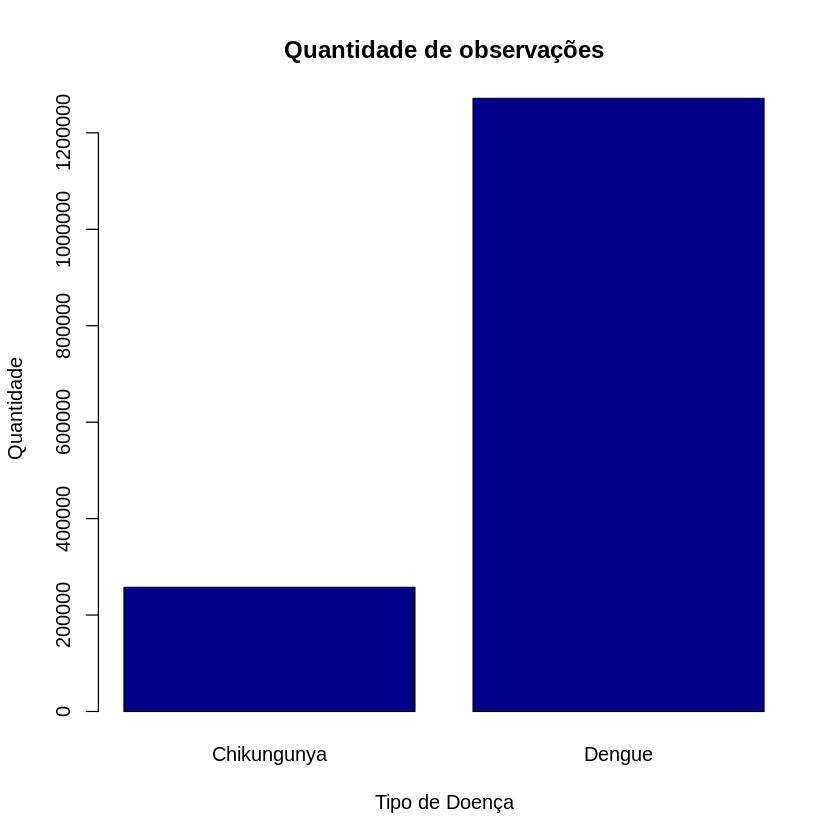

[1] 1070180

[1] 458648


      1       0 
 257410 1271418 

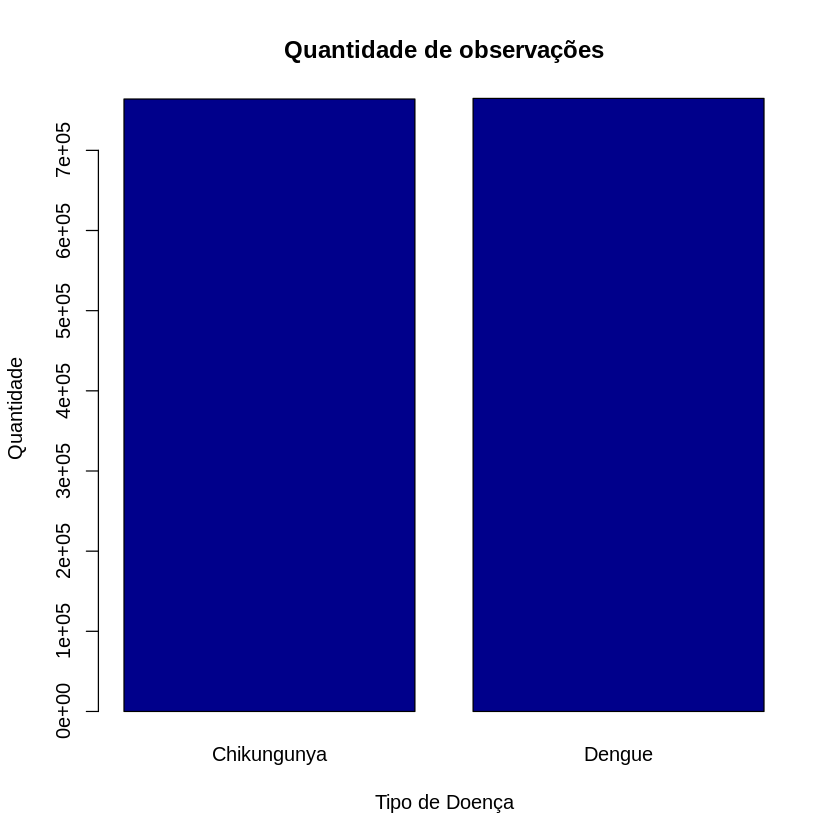

In [ ]:
# Instancia a biblioteca para carregar os arquivos diretamente do servidor de FTP (File Transfer Protocol) dos
# servidores do Ministério da Saúde. Importa dos dados e os transforma em dataframes que podem ser acessados pelo R

#sinan_dengue_final <- fetch_datasus(year_start = 2017, year_end = 2019, uf = "all", information_system = "SINAN-DENGUE-FINAL")
#sinan_chikungunya_final <- fetch_datasus(year_start = 2017, year_end = 2019, uf = "all", information_system = "SINAN-CHIKUNGUNYA-FINAL")
#sinan_dengue_final <- fetch_datasus(year_start = 2017, year_end = 2019, uf = "all", information_system = "SINAN-ZIKA-FINAL")

#sinan_dengue_final = sinan_dengue_final %>% select(FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO)
#sinan_chikungunya_final = sinan_chikungunya_final %>% select(FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO)

#sinan_chikungunya_final$DOENCA = 0
#sinan_dengue_final$DOENCA = 1

#TOTAL_DENGUE_CHIK <-rbind(sinan_chikungunya_final, sinan_dengue_final)

TOTAL_DENGUE_CHIK = TOTAL_DENGUE_CHIK %>% select(DOENCA,SG_UF,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE, MIALGIA, CEFALEIA, EXANTEMA, VOMITO, NAUSEA, DOR_COSTAS, CONJUNTVIT, ARTRITE, ARTRALGIA, PETEQUIA_N, LEUCOPENIA, LACO, DOR_RETRO)



TOTAL_DENGUE_CHIK$DOENCA <- as.factor(TOTAL_DENGUE_CHIK$DOENCA)
levels(TOTAL_DENGUE_CHIK$DOENCA) <-c(1,0)
TOTAL_DENGUE_CHIK$DOENCA <- relevel(TOTAL_DENGUE_CHIK$DOENCA,1)

levels(TOTAL_DENGUE_CHIK$FEBRE) <-c(1,0)
TOTAL_DENGUE_CHIK$FEBRE <- relevel(TOTAL_DENGUE_CHIK$FEBRE,1)

levels(TOTAL_DENGUE_CHIK$MIALGIA) <-c(1,0)
TOTAL_DENGUE_CHIK$MIALGIA <- relevel(TOTAL_DENGUE_CHIK$MIALGIA,1)

levels(TOTAL_DENGUE_CHIK$CEFALEIA) <-c(1,0)
TOTAL_DENGUE_CHIK$CEFALEIA <- relevel(TOTAL_DENGUE_CHIK$CEFALEIA,1)

levels(TOTAL_DENGUE_CHIK$EXANTEMA) <-c(1,0)
TOTAL_DENGUE_CHIK$EXANTEMA <- relevel(TOTAL_DENGUE_CHIK$EXANTEMA,1)

levels(TOTAL_DENGUE_CHIK$VOMITO) <-c(1,0)
TOTAL_DENGUE_CHIK$VOMITO <- relevel(TOTAL_DENGUE_CHIK$VOMITO,1)

levels(TOTAL_DENGUE_CHIK$NAUSEA) <-c(1,0)
TOTAL_DENGUE_CHIK$NAUSEA <- relevel(TOTAL_DENGUE_CHIK$NAUSEA,1)

levels(TOTAL_DENGUE_CHIK$DOR_COSTAS) <-c(1,0)
TOTAL_DENGUE_CHIK$DOR_COSTAS <- relevel(TOTAL_DENGUE_CHIK$DOR_COSTAS,1)

levels(TOTAL_DENGUE_CHIK$CONJUNTVIT) <-c(1,0)
TOTAL_DENGUE_CHIK$CONJUNTVIT <- relevel(TOTAL_DENGUE_CHIK$CONJUNTVIT,1)

levels(TOTAL_DENGUE_CHIK$ARTRITE) <-c(1,0)
TOTAL_DENGUE_CHIK$ARTRITE <- relevel(TOTAL_DENGUE_CHIK$ARTRITE,1)

levels(TOTAL_DENGUE_CHIK$ARTRALGIA) <-c(1,0)
TOTAL_DENGUE_CHIK$ARTRALGIA <- relevel(TOTAL_DENGUE_CHIK$ARTRALGIA,1)

levels(TOTAL_DENGUE_CHIK$PETEQUIA_N) <-c(1,0)
TOTAL_DENGUE_CHIK$PETEQUIA_N <- relevel(TOTAL_DENGUE_CHIK$PETEQUIA_N,1)

levels(TOTAL_DENGUE_CHIK$LEUCOPENIA) <-c(1,0)
TOTAL_DENGUE_CHIK$LEUCOPENIA <- relevel(TOTAL_DENGUE_CHIK$LEUCOPENIA,1)

levels(TOTAL_DENGUE_CHIK$LACO) <-c(1,0)
TOTAL_DENGUE_CHIK$LACO <- relevel(TOTAL_DENGUE_CHIK$LACO,1)

levels(TOTAL_DENGUE_CHIK$DOR_RETRO) <-c(1,0)
TOTAL_DENGUE_CHIK$DOR_RETRO <- relevel(TOTAL_DENGUE_CHIK$DOR_RETRO,1)

#Retira da análise dados que tenham colunas faltanates N/A
nrow(TOTAL_DENGUE_CHIK)
TOTAL_DENGUE_CHIK = na.omit(TOTAL_DENGUE_CHIK)
nrow(TOTAL_DENGUE_CHIK)

#Mostrando que os dados estão desbalanceados e precisam ser balanceados antes da analise
table(TOTAL_DENGUE_CHIK$DOENCA)

# plot unbalanced data highlighting the majority and
# minority class examples.
barplot(table(TOTAL_DENGUE_CHIK$DOENCA), main = "Quantidade de observações",
        xlab = "Tipo de Doença",
        ylab = "Quantidade",
        names.arg = c("Chikungunya", "Dengue"),
        col = "darkblue",
        horiz = FALSE)


#Balanceando os dados usando ROSE
TOTAL_DENGUE_CHIKB <- ROSE(DOENCA ~ ., data=TOTAL_DENGUE_CHIK)$data

table(TOTAL_DENGUE_CHIK$DOENCA)


#table(TOTAL_DENGUE_CHIKB$DOENCA)
barplot(table(TOTAL_DENGUE_CHIKB$DOENCA), main = "Quantidade de observações",
        xlab = "Tipo de Doença",
        ylab = "Quantidade",
        names.arg = c("Chikungunya", "Dengue"),
        col = "darkblue",
        horiz = FALSE)

#library(smotefamily)
#smoted_data <- SMOTE(TOTAL_DENGUE_CHIK, TOTAL_DENGUE_CHIK$OBITO, K = 5, dup_size = 0)
#TOTAL_DENGUE_CHIKB <-TOTAL_DENGUE_CHIK

#dados_treino <- TOTAL_DENGUE_CHIK

index_treino<-sample(1:nrow(TOTAL_DENGUE_CHIKB),round(0.7*nrow(TOTAL_DENGUE_CHIK)))

dados_treino<-TOTAL_DENGUE_CHIKB[index_treino,]

dados_teste<-TOTAL_DENGUE_CHIKB[-index_treino,]

nrow(dados_treino)
nrow(dados_teste)

table(TOTAL_DENGUE_CHIK$DOENCA)



     0      1 
764016 764812 


Call:
glm(formula = DOENCA ~ SG_UF + NU_IDADE_N + CS_SEXO + CS_RACA + 
    CS_ESCOL_N + FEBRE + MIALGIA + CEFALEIA + EXANTEMA + VOMITO + 
    NAUSEA + DOR_COSTAS + CONJUNTVIT + ARTRITE + ARTRALGIA + 
    PETEQUIA_N + LEUCOPENIA + LACO + DOR_RETRO, family = binomial("logit"), 
    data = dados_treino)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3539  -0.0476  -0.0021   0.0499   4.7537  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)   0.340210   0.150842    2.255 0.024108 *  
SG_UF12      -0.937792   0.160332   -5.849 4.94e-09 ***
SG_UF13      -1.405444   0.221463   -6.346 2.21e-10 ***
SG_UF14       0.414806   0.150687    2.753 0.005909 ** 
SG_UF15       1.739544   0.138612   12.550  < 2e-16 ***
SG_UF16       0.665550   0.181868    3.660 0.000253 ***
SG_UF17      -0.721428   0.141648   -5.093 3.52e-07 ***
SG_UF21       1.957681   0.141543   13.831  < 2e-16 ***
SG_UF22       0.763112   0.140247    5.441 5.29e-08 ***
SG_UF23 


Call: 
accuracy.meas(response = dados_teste$DOENCA, predicted = pred.teste, 
    threshold = 0.5)

Examples are labelled as positive when predicted is greater than 0.5 

precision: 0.982
recall: 0.976
F: 0.490

   
         0      1
  0 224620   4141
  1   5461 224426

Warning message in plot_confusion_matrix(cfm, target_col = "target", prediction_col = "prediction", :
“'ggimage' is missing. Will not plot arrows and zero-shading.”
Warning message in plot_confusion_matrix(cfm, target_col = "target", prediction_col = "prediction", :
“'rsvg' is missing. Will not plot arrows and zero-shading.”


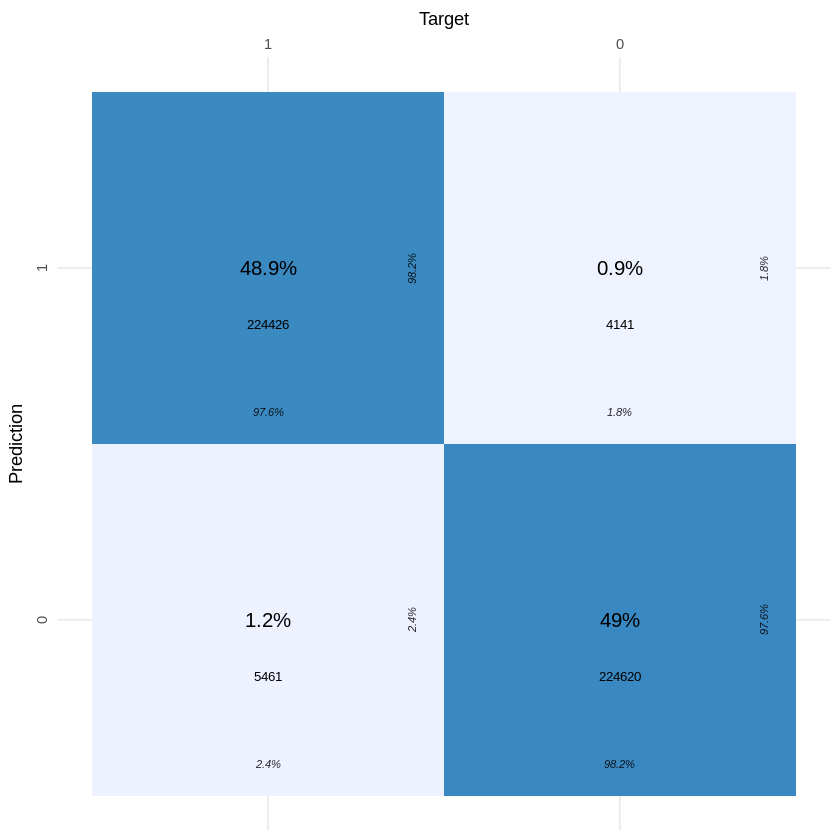

Area under the curve (AUC): 0.996

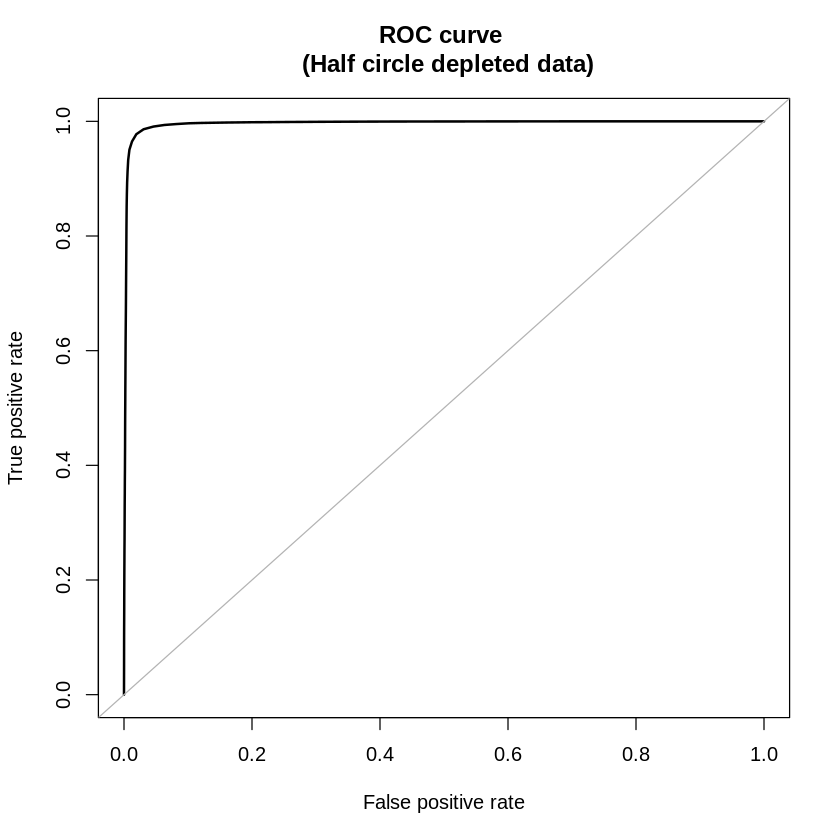

In [ ]:
###########################################################################
#Análise Regressão Logistica:                                   05/01/2021#
###########################################################################

table(TOTAL_DENGUE_CHIKB$DOENCA)


model1<-glm(DOENCA~SG_UF+NU_IDADE_N+CS_SEXO+CS_RACA+CS_ESCOL_N+FEBRE+MIALGIA+CEFALEIA+EXANTEMA+VOMITO+NAUSEA+DOR_COSTAS+CONJUNTVIT+ARTRITE+ARTRALGIA+PETEQUIA_N+LEUCOPENIA+LACO+DOR_RETRO,data=dados_treino,family = binomial("logit"))

summary(model1)

pred.teste<-predict(model1,dados_teste,type="response")
accuracy.meas(dados_teste$DOENCA, pred.teste, threshold = 0.5)

#coef(model1)

# Odds e o seu IC 95%
#odds<-exp(coef(model1))
#IC<-exp(confint(model1))
#round((cbind(odds,IC)),3)


pred.Teste<-predict(model1,dados_teste,type="response")
dados_teste$PredDoenca<-pred.Teste

dados_conf_matrix <- dados_teste %>% mutate_at(vars(PredDoenca), funs(round(., 0)))
dados_conf_matrix$DOENCA <- as.numeric(dados_conf_matrix$DOENCA) - 1
dados_conf_matrix$DOENCA <- as.integer(dados_conf_matrix$DOENCA)
dados_conf_matrix$PredDoenca <- as.integer(dados_conf_matrix$PredDoenca)
basic_table <- table(dados_conf_matrix$DOENCA,dados_conf_matrix$PredDoenca)
basic_table


cfm <- as_tibble(basic_table, .name_repair = ~ c("target", "prediction","n"))


plot_confusion_matrix(cfm, 
                      target_col = "target", 
                      prediction_col = "prediction",
                     counts_col = "n")


#names(dados_teste)

#dados_teste
#write.csv(dados_teste,"Dados.csv", row.names = TRUE)

#table(dados_teste$DOENCA,dados_teste$PredDoenca>0.5)

roc.curve(dados_teste$DOENCA, dados_teste$PredDoenca, main="ROC curve \n (Half circle depleted data)")

#extract_eq(model1, wrap = TRUE)
#extract_eq(model1, wrap = TRUE, show_distribution = TRUE)

#Remover a Coluna predict pois ela influencia nas outras analises.
dados_teste <- dados_teste[,-22]

In [ ]:
str(dados_teste)

'data.frame':	458648 obs. of  21 variables:
 $ DOENCA    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ SG_UF     : Factor w/ 27 levels "11","12","13",..: 12 26 20 26 17 20 9 7 26 17 ...
 $ NU_IDADE_N: num  48.28 6.29 39.44 61.49 15.11 ...
 $ CS_SEXO   : Factor w/ 3 levels "F","I","M": 3 3 3 1 1 3 1 1 3 1 ...
 $ CS_RACA   : Factor w/ 6 levels "1","2","3","4",..: 4 4 2 4 6 6 6 4 4 4 ...
 $ CS_ESCOL_N: Factor w/ 18 levels "1","2","3","4",..: 8 3 8 11 11 11 3 6 5 11 ...
 $ FEBRE     : Factor w/ 2 levels "1","0": 1 1 1 1 1 1 1 1 1 1 ...
 $ MIALGIA   : Factor w/ 2 levels "1","0": 1 1 1 1 1 1 2 1 1 1 ...
 $ CEFALEIA  : Factor w/ 2 levels "1","0": 1 1 2 1 1 1 2 1 1 1 ...
 $ EXANTEMA  : Factor w/ 2 levels "1","0": 2 1 2 2 2 2 2 2 2 2 ...
 $ VOMITO    : Factor w/ 2 levels "1","0": 2 1 2 2 1 1 2 2 2 1 ...
 $ NAUSEA    : Factor w/ 2 levels "1","0": 2 1 2 1 2 1 2 2 1 1 ...
 $ DOR_COSTAS: Factor w/ 2 levels "1","0": 2 2 2 2 2 2 2 2 1 1 ...
 $ CONJUNTVIT: Factor w/ 2 levels "1","0": 2 2 2 

In [ ]:
#Mellhorar este algoritmo para cortar a amostra dos dados
index_resize<-sample(1:nrow(dados_treino),round(0.05*nrow(dados_treino)))
dados_treino<-dados_treino[+index_resize,]
print("Dados Treino: ")
nrow(dados_treino)

index_resize<-sample(1:nrow(dados_teste),round(0.05*nrow(dados_teste)))
dados_teste<-dados_teste[+index_resize,]
nrow(dados_teste)


#Remover a Coluna predict pois ela influencia nas outras analises.
dados_teste <- dados_teste[,-21]


[1] "Dados Treino: "


[1] 53509

[1] 22932

In [ ]:
str(dados_teste)
dados_teste <- dados_teste[,-21]
str(dados_teste)


'data.frame':	22932 obs. of  20 variables:
 $ DOENCA    : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 2 1 2 ...
 $ SG_UF     : Factor w/ 27 levels "11","12","13",..: 19 14 19 7 8 19 10 19 8 19 ...
 $ NU_IDADE_N: num  49.8 44.9 28.8 45.2 33.3 ...
 $ CS_SEXO   : Factor w/ 3 levels "F","I","M": 3 1 1 3 3 1 1 1 3 1 ...
 $ CS_RACA   : Factor w/ 6 levels "1","2","3","4",..: 4 1 1 4 4 4 4 6 4 6 ...
 $ CS_ESCOL_N: Factor w/ 18 levels "1","2","3","4",..: 18 15 15 5 18 14 9 18 8 18 ...
 $ FEBRE     : Factor w/ 2 levels "1","0": 1 1 1 1 1 1 1 1 1 2 ...
 $ MIALGIA   : Factor w/ 2 levels "1","0": 1 2 1 1 1 2 2 1 1 2 ...
 $ CEFALEIA  : Factor w/ 2 levels "1","0": 1 1 1 1 2 2 2 2 1 2 ...
 $ EXANTEMA  : Factor w/ 2 levels "1","0": 2 1 1 2 2 2 2 2 2 2 ...
 $ VOMITO    : Factor w/ 2 levels "1","0": 2 2 1 1 2 2 2 2 2 2 ...
 $ NAUSEA    : Factor w/ 2 levels "1","0": 2 2 1 1 1 2 2 2 1 2 ...
 $ DOR_COSTAS: Factor w/ 2 levels "1","0": 2 2 1 1 2 2 2 2 1 2 ...
 $ CONJUNTVIT: Factor w/ 2 levels "1","0": 2 2 2 2 2


Call:
 randomForest(x = dados_treino[, -1], y = dados_treino$DOENCA,      xtest = dados_teste[, -1], ytest = dados_teste$DOENCA, ntree = 200,      mtry = 3, replace = T, keep.forest = T) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.58%
Confusion matrix:
      0     1 class.error
0 26443   393  0.01464451
1   453 26220  0.01698347
                Test set error rate: 1.45%
Confusion matrix:
      0     1 class.error
0 11277   145  0.01269480
1   188 11322  0.01633362


   pred.Teste
        0     1
  0 11277   145
  1   188 11322

Warning message in plot_confusion_matrix(cfm, target_col = "target", prediction_col = "prediction", :
“'ggimage' is missing. Will not plot arrows and zero-shading.”
Warning message in plot_confusion_matrix(cfm, target_col = "target", prediction_col = "prediction", :
“'rsvg' is missing. Will not plot arrows and zero-shading.”


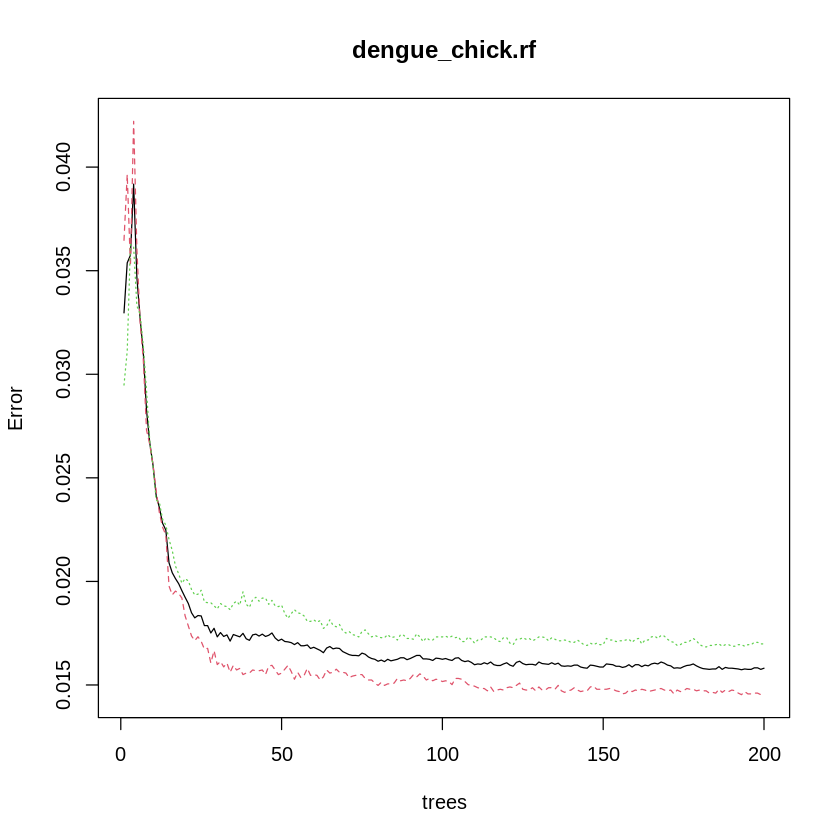

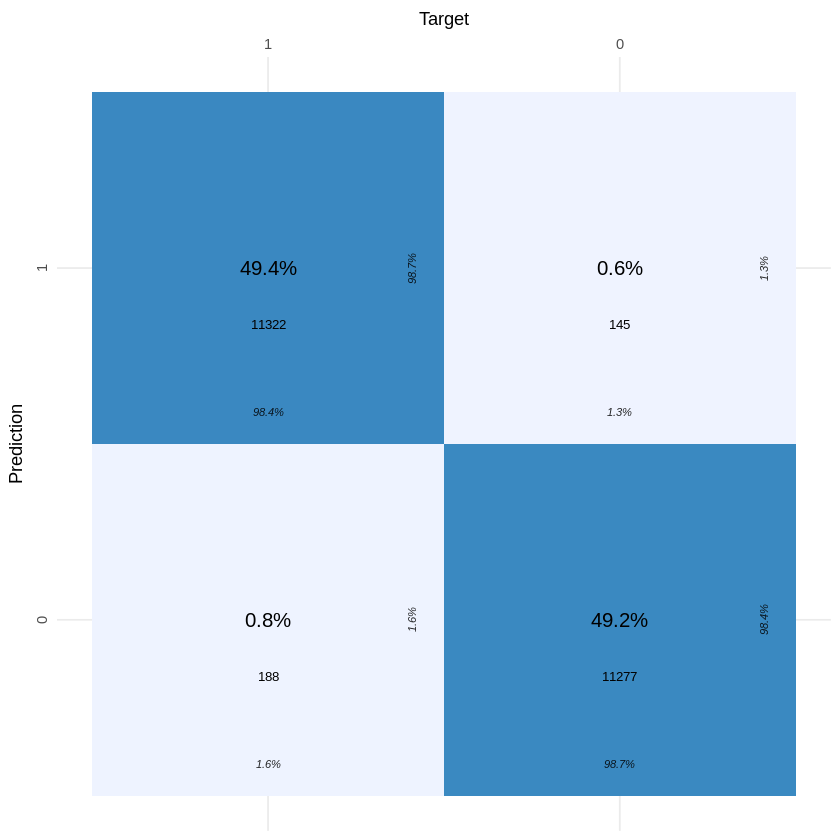

Area under the curve (AUC): 0.985

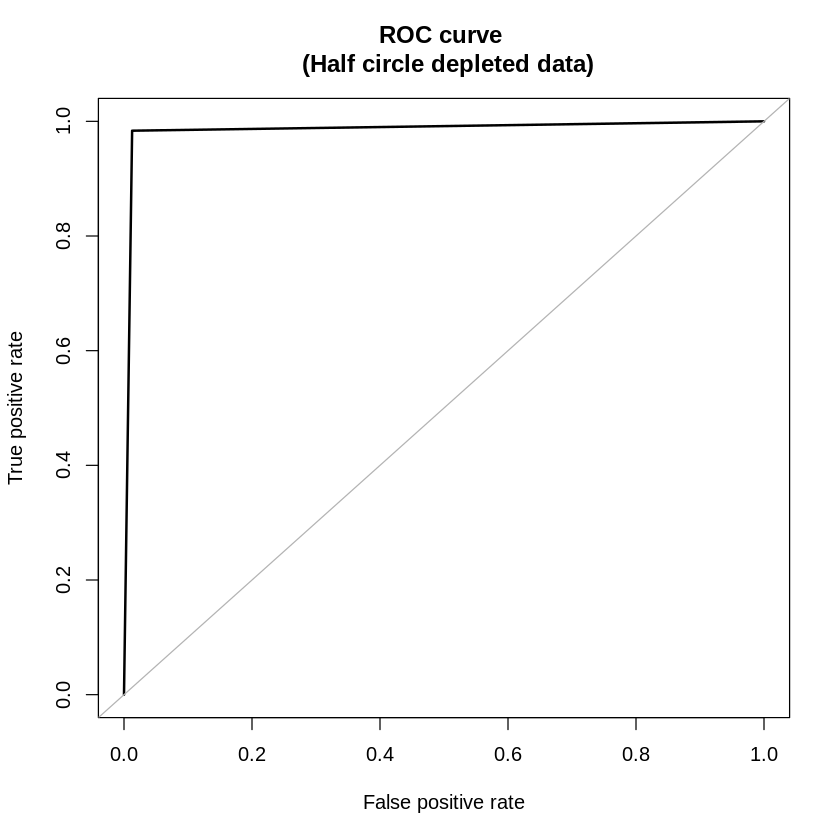

In [ ]:
###########################################################################
#Análise Usando Randown Forests:                                05/01/2021#
###########################################################################

# Print the dataset
#print(head(dados_treino))

# Create random forest for regression
#DOENCA~+FEBRE+MIALGIA+CEFALEIA+EXANTEMA+VOMITO+NAUSEA+DOR_COSTAS+CONJUNTVIT+ARTRITE+ARTRALGIA+PETEQUIA_N+LEUCOPENIA+DOR_RETRO,data=dados_treino
#dengue_chick.rf <- randomForest(DOENCA ~ FEBRE+MIALGIA+CEFALEIA+EXANTEMA+VOMITO+NAUSEA+DOR_COSTAS+CONJUNTVIT+ARTRITE+ARTRALGIA+PETEQUIA_N+LEUCOPENIA+DOR_RETRO, data = dados_treino, mtry = 2,
#                         importance = TRUE, na.action = na.omit)


dengue_chick.rf <- randomForest(x = dados_treino[,-1],
                                y = dados_treino$DOENCA,
                                xtest = dados_teste[,-1],
                                ytest = dados_teste$DOENCA,
                                ntree = 200,
                                mtry = 3,
                                replace = T,
                                #nodesize = 10,
                                #maxnode = 15,
                                #importance = TRUE,
                                keep.forest = T)

# Print regression model
print(dengue_chick.rf)

#varImpPlot(dengue_chick.rf)

# Output to be present as PNG file 
#png(file = "randomForestRegression.png")

# Plot the error vs the number of trees graph
plot(dengue_chick.rf)

#predict(dengue_chick.rf, dados_teste,type="response")

pred.Teste <- predict(dengue_chick.rf,dados_teste[,-1],type="response")


cm = table(dados_teste$DOENCA, pred.Teste)

cm

#pred.Teste<-predict(dengue_chick.rf,dados_teste,type="response")
#dados_teste.rf$PredDoenca<-pred.Teste

#head(dados_teste.rf)

#dados_conf_matrix <- dados_teste %>% mutate_at(vars(PredDoenca), funs(round(., 0)))
#dados_conf_matrix$DOENCA <- as.numeric(dados_conf_matrix$DOENCA) - 1
#dados_conf_matrix$DOENCA <- as.integer(dados_conf_matrix$DOENCA)
#dados_conf_matrix$PredDoenca <- as.integer(dados_conf_matrix$PredDoenca)
#basic_table <- table(dados_conf_matrix$DOENCA,dados_conf_matrix$PredDoenca)
#basic_table


cfm <- as_tibble(cm, .name_repair = ~ c("target", "prediction","n"))


plot_confusion_matrix(cfm, 
                      target_col = "target", 
                      prediction_col = "prediction",
                     counts_col = "n")

roc.curve(dados_teste$DOENCA, pred.Teste, main="ROC curve \n (Half circle depleted data)")

#options(repos='http://cran.rstudio.org')
#have.packages <- installed.packages()
#cran.packages <- c('devtools','plotrix','randomForest','tree')
#to.install <- setdiff(cran.packages, have.packages[,1])
#if(length(to.install)>0) install.packages(to.install)

#library(devtools)
#if(!('reprtree' %in% installed.packages())){
#  install_github('araastat/reprtree')
#}
#for(p in c(cran.packages, 'reprtree')) eval(substitute(library(pkg), list(pkg=p)))


#library(reprtree)


#reprtree:::plot.getTree(dengue_chick.rf)











In [ ]:
#Mellhorar este algoritmo para cortar a amostra dos dados
index_resize<-sample(1:nrow(dados_treino),round(0.1*nrow(dados_treino)))
dados_treino<-dados_treino[+index_resize,]
nrow(dados_treino)

index_resize<-sample(1:nrow(dados_teste),round(0.1*nrow(dados_teste)))
dados_teste<-dados_teste[+index_resize,]
nrow(dados_teste)

[1] 5351

[1] 2293

In [ ]:
dados_teste <- dados_teste[,-21]


In [ ]:
###########################################################################
#Análise Usando Redes Neurais Artificiais:                      05/01/2021#
###########################################################################

m <- model.matrix(~DOENCA+SG_UF+NU_IDADE_N+CS_SEXO+CS_RACA+CS_ESCOL_N+FEBRE+MIALGIA+CEFALEIA+EXANTEMA+VOMITO+NAUSEA+DOR_COSTAS+CONJUNTVIT+ARTRITE+ARTRALGIA+PETEQUIA_N+LEUCOPENIA+LACO+DOR_RETRO, data=dados_treino)

head(m)





dengue_chick.nn <- neuralnet(DOENCA1~NU_IDADE_N+CS_SEXOI+CS_SEXOM+CS_RACA2+CS_RACA3+CS_RACA4+CS_RACA5+CS_RACA9+CS_ESCOL_N2+CS_ESCOL_N3+CS_ESCOL_N4+CS_ESCOL_N5+CS_ESCOL_N6+CS_ESCOL_N7+CS_ESCOL_N8+CS_ESCOL_N9+CS_ESCOL_N10+CS_ESCOL_N11+CS_ESCOL_N12+CS_ESCOL_N13+CS_ESCOL_N14+CS_ESCOL_N15+CS_ESCOL_N16+CS_ESCOL_N17+CS_ESCOL_N18
+FEBRE0+MIALGIA0+CEFALEIA0+EXANTEMA0+VOMITO0+NAUSEA0+DOR_COSTAS0+CONJUNTVIT0+ARTRITE0+ARTRALGIA0+PETEQUIA_N0+LEUCOPENIA0+LACO0+DOR_RETRO0,data=m,
hidden=c(3,1),
threshold = 0.01,
stepmax = 1e+06,
rep = 1,
startweights = NULL,
learningrate.limit = NULL,
learningrate.factor = list(minus = 0.5, plus = 1.2),
learningrate = NULL,
lifesign = "none",
lifesign.step = 1000,
algorithm = "rprop+",
err.fct = "sse",
act.fct = "logistic",
linear.output = TRUE,
exclude = NULL,
constant.weights = NULL,
likelihood = FALSE)

dengue_chick.nn$result.matrix



,(Intercept),DOENCA1,SG_UF12,SG_UF13,SG_UF14,SG_UF15,SG_UF16,SG_UF17,SG_UF21,SG_UF22,⋯,VOMITO0,NAUSEA0,DOR_COSTAS0,CONJUNTVIT0,ARTRITE0,ARTRALGIA0,PETEQUIA_N0,LEUCOPENIA0,LACO0,DOR_RETRO0
859442,1,1,0,0,0,0,0,0,0,0,⋯,0,1,0,1,0,0,1,1,1,1
390100,1,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
1174612,1,1,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,1,1,1,1
62020,1,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
365573,1,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
362951,1,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,0,1,1,1,0


error,3.207205e+01
reached.threshold,9.153419e-03
steps,1.347300e+04
Intercept.to.1layhid1,-1.466869e+01
NU_IDADE_N.to.1layhid1,1.383443e-01
CS_SEXOI.to.1layhid1,-7.008331e+02
CS_SEXOM.to.1layhid1,-4.956167e-01
CS_RACA2.to.1layhid1,3.832733e+00
CS_RACA3.to.1layhid1,2.147632e-01
CS_RACA4.to.1layhid1,2.341154e+00
CS_RACA5.to.1layhid1,-3.105661e+02


In [ ]:
head(dados_teste)

,DOENCA,SG_UF,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
780442,1,16,27.48308,F,1,15,1,1,1,1,0,1,0,0,1,1,1,0,0,1
763338,0,50,88.73846,F,1,11,1,1,1,0,0,0,1,0,0,0,0,0,0,0
163228,0,31,52.45988,F,1,8,1,0,1,0,0,0,1,0,0,1,0,0,0,1
630964,0,31,20.78095,F,4,7,1,0,1,0,1,1,1,0,0,0,0,0,1,0
1013889,1,31,43.11124,F,1,18,1,1,1,0,0,1,1,0,1,0,1,0,0,1
1321452,1,23,36.29709,F,9,11,1,1,1,0,1,0,1,0,0,1,1,0,0,0


   
       0    1
  0 1152   25
  1   33 1083

Warning message in plot_confusion_matrix(cfm, target_col = "target", prediction_col = "prediction", :
“'ggimage' is missing. Will not plot arrows and zero-shading.”
Warning message in plot_confusion_matrix(cfm, target_col = "target", prediction_col = "prediction", :
“'rsvg' is missing. Will not plot arrows and zero-shading.”
Warning message in if (cl <- class(predicted) == "factor" | class(predicted) == :
“the condition has length > 1 and only the first element will be used”


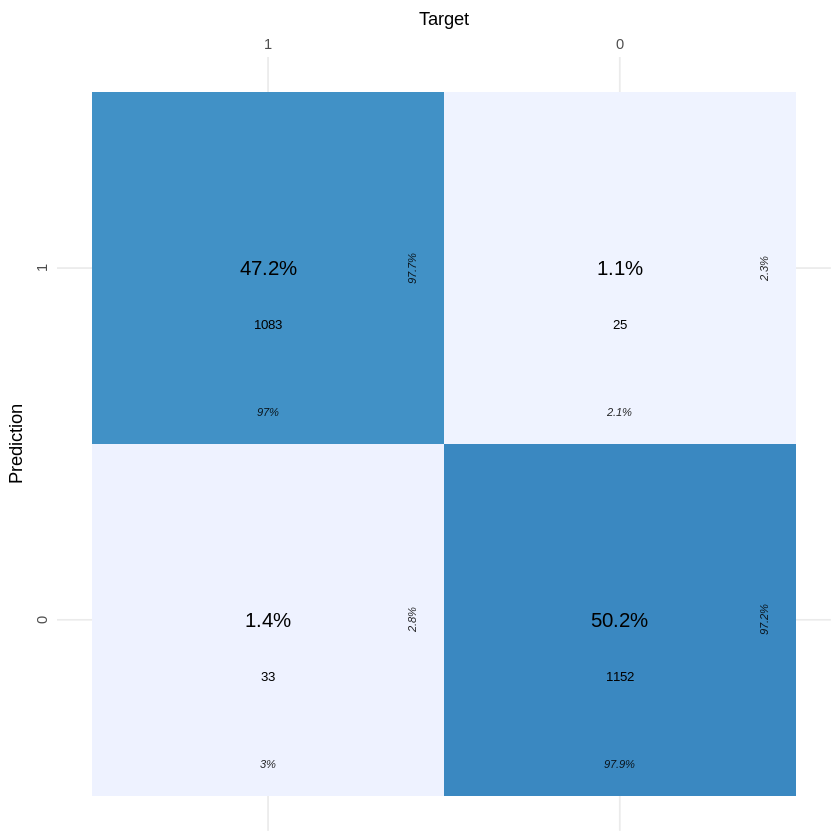

Area under the curve (AUC): 0.976

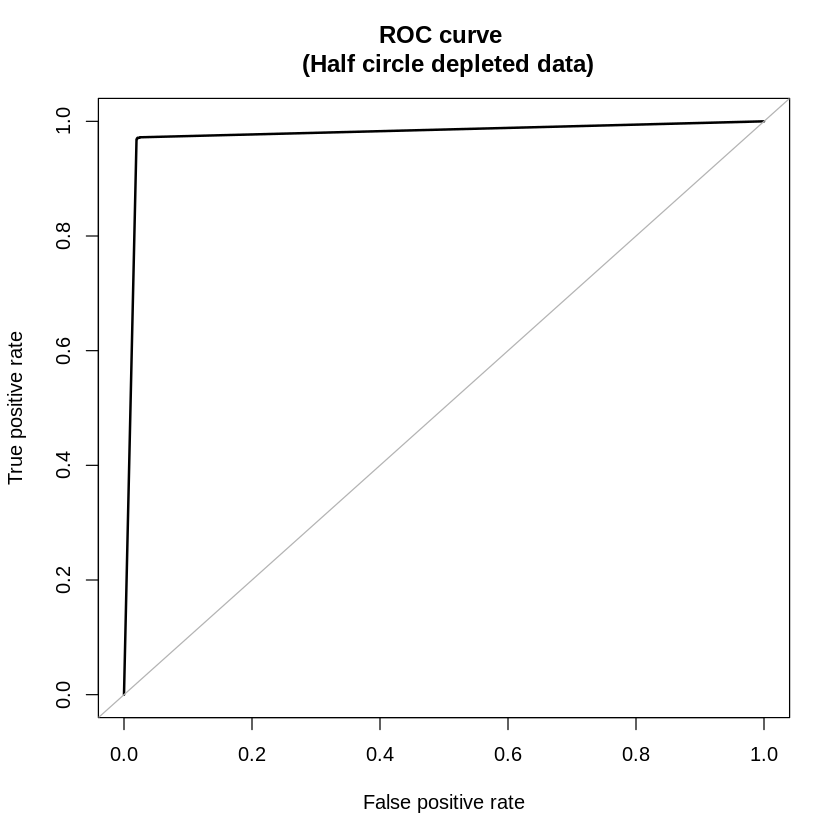

In [ ]:
##Testando o modelo


m1 <- model.matrix(~DOENCA+SG_UF+NU_IDADE_N+CS_SEXO+CS_RACA+CS_ESCOL_N+FEBRE+MIALGIA+CEFALEIA+EXANTEMA+VOMITO+NAUSEA+DOR_COSTAS+CONJUNTVIT+ARTRITE+ARTRALGIA+PETEQUIA_N+LEUCOPENIA+LACO+DOR_RETRO, data=dados_teste)


#m1 <- model.matrix(DOENCA+NU_IDADE_N+CS_SEXO+CS_RACA+CS_ESCOL_N+FEBRE+MIALGIA+CEFALEIA+EXANTEMA+VOMITO+NAUSEA+DOR_COSTAS+CONJUNTVIT+ARTRITE+ARTRALGIA+PETEQUIA_N+LEUCOPENIA+LACO+DOR_RETRO, data=dados_teste)
#head(m1)

m2 <- data.frame(m1)





#plot(nn)

#Ultimately, we yield an 92.5% (37/40) accuracy rate in determining whether a stock pays a dividend or not.


pred.Teste<-predict(dengue_chick.nn,m1,type="response")
dados_teste$PredDoenca<-pred.Teste


dados_conf_matrix <- dados_teste %>% mutate_at(vars(PredDoenca), funs(round(., 0)))
dados_conf_matrix$DOENCA <- as.numeric(dados_conf_matrix$DOENCA) - 1
dados_conf_matrix$DOENCA <- as.integer(dados_conf_matrix$DOENCA)
dados_conf_matrix$PredDoenca <- as.integer(dados_conf_matrix$PredDoenca)
basic_table <- table(dados_conf_matrix$DOENCA,dados_conf_matrix$PredDoenca)
basic_table


cfm <- as_tibble(basic_table, .name_repair = ~ c("target", "prediction","n"))


plot_confusion_matrix(cfm, 
                      target_col = "target", 
                      prediction_col = "prediction",
                     counts_col = "n")



roc.curve(dados_teste$DOENCA, dados_teste$PredDoenca, main="ROC curve \n (Half circle depleted data)")



Loading required package: usethis


Attaching package: ‘devtools’


The following objects are masked from ‘package:R.oo’:

    check, unload


ℹ SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef

Loading required package: scales


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return

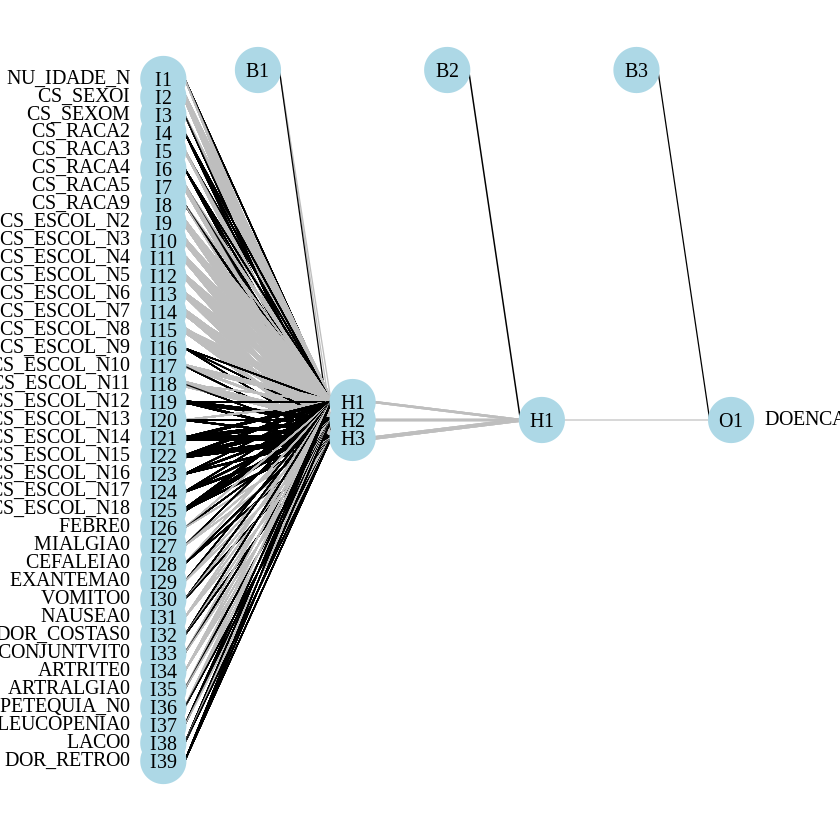

In [ ]:
#import the function from Github
library(devtools)
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')

#plot ouput
par(mar=numeric(4),family='times')
plot.nnet(dengue_chick.nn)
